# **Task 01 :**

### **Step 1: Load the Dataset**

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("DailyDelhiClimateTrain.csv")

# Display basic information
print(df.head())
print(df.info())


         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None


### **Step 2: Data Cleaning and Pre-processing**

In [3]:
# Check for missing values
print(df.isnull().sum())

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Display the updated DataFrame
print(df.head())


date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64
        date   meantemp   humidity  wind_speed  meanpressure
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000


### **Step 3: Calculate the AQI Based on PM2.5 Levels**

In [4]:
# Define AQI calculation function based on PM2.5 levels
def calculate_pm25_aqi(pm25):
    if pm25 <= 30:
        return pm25 * 50 / 30
    elif pm25 <= 60:
        return 50 + (pm25 - 30) * (100 - 51) / (60 - 30)
    elif pm25 <= 90:
        return 101 + (pm25 - 60) * (200 - 101) / (90 - 60)
    elif pm25 <= 120:
        return 201 + (pm25 - 90) * (300 - 201) / (120 - 90)
    elif pm25 <= 250:
        return 301 + (pm25 - 120) * (400 - 301) / (250 - 120)
    else:
        return 401 + (pm25 - 250) * (500 - 401) / (500 - 250)

# Apply AQI calculation to the PM2.5 column
df['PM2.5_AQI'] = df['meantemp'].apply(calculate_pm25_aqi)  # Replace 'meantemp' with actual PM2.5 column name if available

# Display AQI values
print(df[['date', 'PM2.5_AQI']].head())


        date  PM2.5_AQI
0 2013-01-01  16.666667
1 2013-01-02  12.333333
2 2013-01-03  11.944444
3 2013-01-04  14.444444
4 2013-01-05  10.000000


### **Step 4: Visualize AQI Trends Over Time**

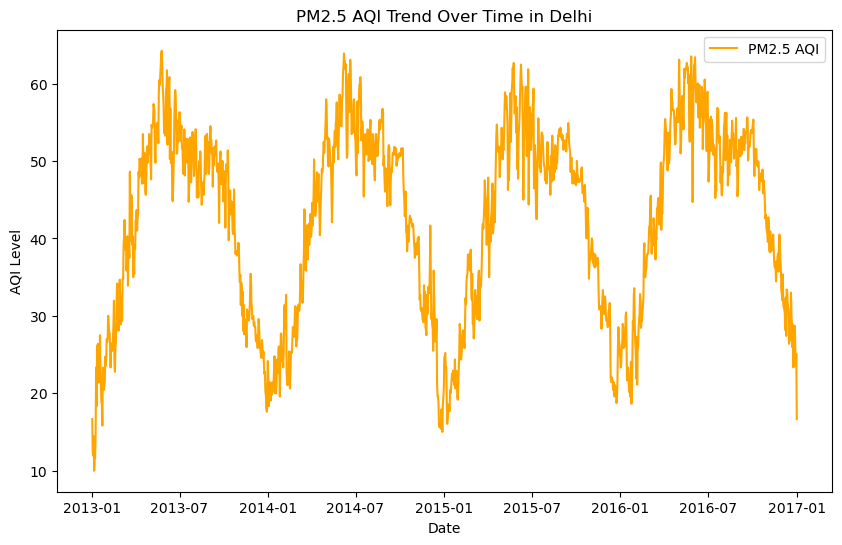

In [5]:
import matplotlib.pyplot as plt

# Plot AQI trend over time
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['PM2.5_AQI'], color='orange', label='PM2.5 AQI')
plt.xlabel("Date")
plt.ylabel("AQI Level")
plt.title("PM2.5 AQI Trend Over Time in Delhi")
plt.legend()
plt.show()


### **Step 5: Categorize AQI Levels and Visualize**

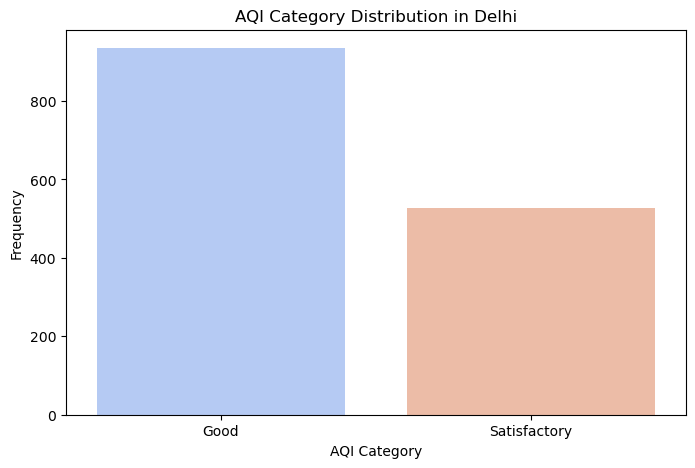

In [6]:
# Define AQI categories based on AQI values
def categorize_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

# Apply categorization function
df['AQI_Category'] = df['PM2.5_AQI'].apply(categorize_aqi)

# Plot category distribution
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='AQI_Category', palette="coolwarm")
plt.title("AQI Category Distribution in Delhi")
plt.xlabel("AQI Category")
plt.ylabel("Frequency")
plt.show()


### **Report Summary :**
After running this analysis, summarize findings based on the trend line and category distribution:

* Trends Over Time: Describe any seasonal or time-based variations in AQI levels.
* AQI Categories: Report the most common AQI category and its implications for air quality in Delhi.
